In [1]:

import pmdarima as pm
from pmdarima.datasets import load_wineind
import warnings
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline 
from matplotlib.pylab import rcParams 
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
# import pyramid as pm
from sklearn import metrics 
from pmdarima import auto_arima
from functools import reduce
from scipy.optimize import minimize
import numpy as np
from pandas.tseries.offsets import CustomBusinessMonthBegin


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Dependencies and Setupjj
# %matplotlib inline
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from functools import reduce
# from scipy.optimize import minimize

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File scruboad (Remember to Change These)
data_to_load1 = "Data/Raw Data/KL.csv"
data_to_load2 = "Data/Raw Data/RH.csv"
data_to_load3 = "Data/Raw Data/CPRT.csv"
data_to_load4 = "Data/Raw Data/MTZ.csv"
data_to_load5 = "Data/Raw Data/ESNT.csv"
data_to_load6 = "Data/Raw Data/EW.csv"
data_to_load7 = "Data/Raw Data/EDU.csv"
data_to_load8 = "Data/Raw Data/PAYC.csv"
data_to_load9 = "Data/Raw Data/CDW.csv"
data_to_load10 = "Data/Raw Data/LULU.csv"
data_to_load11 = "Data/Raw Data/VEEV.csv"


KL = pd.read_csv(data_to_load1)
RH = pd.read_csv(data_to_load2)
CPRT = pd.read_csv(data_to_load3)
MTZ = pd.read_csv(data_to_load4)
ESNT = pd.read_csv(data_to_load5)
EW = pd.read_csv(data_to_load6)
EDU = pd.read_csv(data_to_load7)
PAYC = pd.read_csv(data_to_load8)
CDW = pd.read_csv(data_to_load9)
LULU = pd.read_csv(data_to_load10)
VEEV = pd.read_csv(data_to_load11)


In [3]:
# Insert stock labels 
KL['Stock']='KL'
RH['Stock']='RH'
CPRT['Stock']='CPRT'
MTZ['Stock']='MTZ'
ESNT['Stock']='ESNT'
EW['Stock']='EW'
EDU['Stock']='EDU'
PAYC['Stock']='PAYC'
CDW['Stock']='CDW'
LULU['Stock']='LULU'
VEEV['Stock']='VEEV'

In [4]:
KL=VEEV

In [5]:
KL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
1513,2019-10-21,143.800003,147.149994,142.020004,145.059998,145.059998,1611700,VEEV
1514,2019-10-22,146.660004,147.779999,140.520004,141.330002,141.330002,1504600,VEEV
1515,2019-10-23,140.020004,144.529999,138.250000,142.270004,142.270004,988800,VEEV
1516,2019-10-24,143.910004,145.889999,143.410004,144.850006,144.850006,951000,VEEV
1517,2019-10-25,144.000000,147.039993,143.410004,146.770004,146.770004,837900,VEEV


In [6]:
# isolate Adj Close for analysis
KL2 = KL['Adj Close'].dropna().rename(columns={'Adj Close':'Adj_Close'}, inplace = True)

In [7]:
# Get new row count after nulls to ensure accruacy
KL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1.518000e+03
mean,57.592246,58.466798,56.644400,57.608663,57.608663,1.224757e+06
std,39.670578,40.220980,39.021439,39.650446,39.650446,1.053601e+06
min,17.750000,18.360001,17.110001,17.870001,17.870001,8.380000e+04
25%,27.525000,27.922500,27.070000,27.485000,27.485000,7.217750e+05
50%,40.950001,41.520000,40.229999,40.945000,40.945000,9.938000e+05
75%,75.627500,76.747500,74.432501,75.612497,75.612497,1.390150e+06
max,176.000000,176.899994,173.690002,175.649994,175.649994,1.942740e+07


In [8]:
KL2.describe()

count    1518.000000
mean       57.608663
std        39.650446
min        17.870001
25%        27.485000
50%        40.945000
75%        75.612497
max       175.649994
dtype: float64

In [9]:
# Flip to wide format for lognormal returns
# KL2 = KL[('Stock','Date','Adj Close')]
# KL2 = KL[['Date', 'Adj Close','Stock']].rename(columns={'Adj Close':'Adj_Close'})
KL2.to_csv('KL2.csv')

In [10]:
# cHECK FOR NonStat p >.05 means yes
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(KL2.dropna())
# result = adfuller(KL2.Adj_Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.991000
p-value: 0.994170


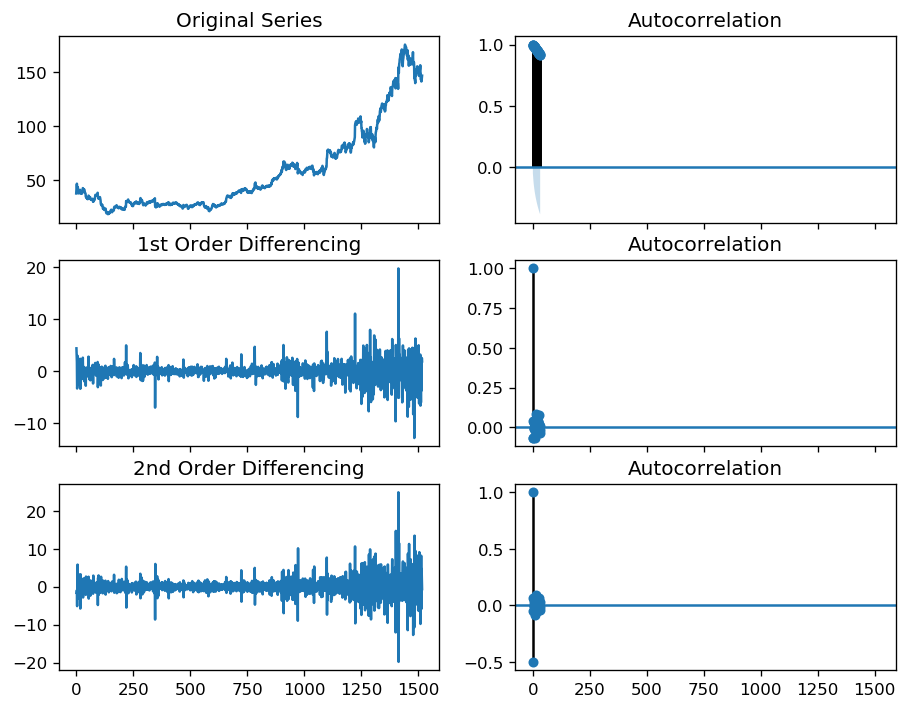

In [11]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(KL2); axes[0, 0].set_title('Original Series')
plot_acf(KL2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(KL2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(KL2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(KL2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(KL2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [12]:

# this is a dataset from R
KL3 = KL2.astype(np.float64)

# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(KL3, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             maxiter=5000,
                             out_of_sample_size =252,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5900.315, BIC=5926.898, Fit time=8.824 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6963.942, BIC=6974.575, Fit time=0.419 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6425.802, BIC=6447.069, Fit time=2.590 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5897.871, BIC=5919.137, Fit time=7.984 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5895.312, BIC=5921.895, Fit time=8.800 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=6424.352, BIC=6445.618, Fit time=2.350 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5882.194, BIC=5914.094, Fit time=27.148 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5894.026, BIC=5931.242, Fit time=54.112 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=5889.331, BIC=5915.914, Fit time=17.744 seconds
Fit ARIMA: order=(0, 1, 2

In [13]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1518
Model:             SARIMAX(0, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -2931.867
Date:                            Sun, 27 Oct 2019   AIC                           5879.733
Time:                                    17:22:58   BIC                           5922.265
Sample:                                         0   HQIC                          5895.575
                                           - 1518                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.002      2.655      0.008       0.001       0.007
ma.L1         -0.0781      0.019     -4.027      0.000      -0.116      -0.040
ma.L2         -0.0556      0.016     -3.397      0.001      -0.088      -0.024
ma.L3          0.0442      0.016      2.705      0.007       0.012       0.076
ar.S.L12      -0.9053      0.047    -19.165      0.000      -0.998      -0.813
ma.S.L12      -0.1343      0.055     -2.451      0.014      -0.242      -0.027
ma.S.L24      -0.8550      0.054    -15.696      0.000      -0.962      -0.748
sigma2         2.7794      0.050     56.041      0.000       2.682       2.877
===================================================================================
Ljung-Box (Q):                       44.03   Jarque-Bera (JB):             19895.80
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               7.62   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model_fit = stepwise_fit.summary()
print(stepwise_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1518
Model:             SARIMAX(0, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -2931.867
Date:                            Sun, 27 Oct 2019   AIC                           5879.733
Time:                                    17:22:58   BIC                           5922.265
Sample:                                         0   HQIC                          5895.575
                                           - 1518                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.002      2.655      0.008       0.001       0.007
ma.L1         -0.0781      0.019   

In [15]:
# import numpy as np
# import pmdarima as pm
# from pmdarima.datasets import load_wineind

# # this is a dataset from R
# wineind = load_wineind().astype(np.float64)
stepwise_fit.resid()

array([37.15787653,  4.43788288,  2.787886  , ...,  0.3200834 ,
        1.92157355,  2.46426357])

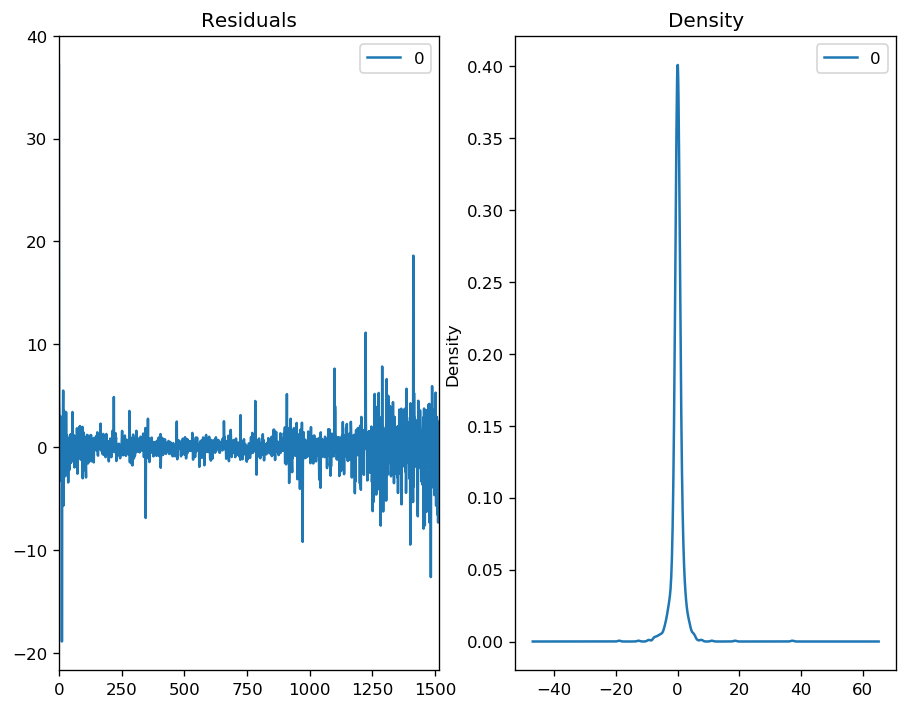

In [16]:
residuals = pd.DataFrame(stepwise_fit.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [17]:
GV= KL.dropna()
GV2 = GV[['Date','Adj Close', 'Stock']]
GV2['Residuals'] = residuals
GV3 = GV2.rename(columns={"Adj Close": "Adj_Close"})
GV3

,Date,Adj_Close,Stock,Residuals
0,2013-10-16,37.160000,VEEV,37.157877
1,2013-10-17,41.599998,VEEV,4.437883
2,2013-10-18,44.389999,VEEV,2.787886
3,2013-10-21,46.240002,VEEV,1.847877
4,2013-10-22,42.950001,VEEV,-3.292124
5,2013-10-23,40.150002,VEEV,-2.802124
6,2013-10-24,43.150002,VEEV,2.997874
7,2013-10-25,43.000000,VEEV,-0.152124
8,2013-10-28,40.470001,VEEV,-2.532121
9,2013-10-29,38.720001,VEEV,-1.752123


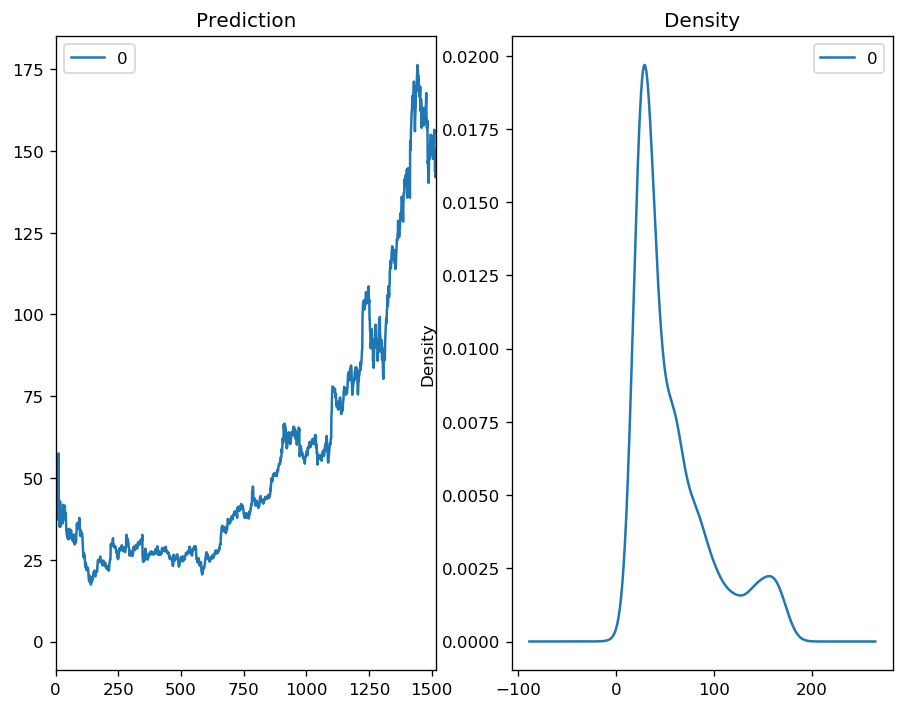

In [18]:
# Model Check - Combine w\ orginal    Adj & Prediction
predict = pd.DataFrame(stepwise_fit.predict_in_sample(dynamic=False))
fig, ax = plt.subplots(1,2)
predict.plot(title="Prediction", ax=ax[0])
predict.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [19]:
data=stepwise_fit.predict_in_sample(dynamic=False).tolist()
plt.show()

In [20]:
dfObj = pd.DataFrame(data, columns = ['Value']) 

In [21]:
# dfObj.to_csv('data.csv')

In [22]:
train2 = int(np.ceil(len(dfObj)*.75))
# test2 = len(dfObj)-train2


## Predictions

In [23]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = dfObj.Value[:train2]
test = dfObj.Value[train2:]

In [ ]:
Forecast=int(len(test))

In [ ]:
KL2.head()

0    37.160000
1    41.599998
2    44.389999
3    46.240002
4    42.950001
dtype: float64

In [ ]:

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = stepwise_fit
# ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(KL2)  

# Forecast
fc, conf = fitted.predict(n_periods=len(test),return_conf_int=True, alpha=0.05)  # 95% conf



In [ ]:
print(fitted.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1518
Model:             SARIMAX(0, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -2931.867
Date:                            Sun, 27 Oct 2019   AIC                           5879.733
Time:                                    17:23:33   BIC                           5922.265
Sample:                                         0   HQIC                          5895.575
                                           - 1518                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.002      2.655      0.008       0.001       0.007
ma.L1         -0.0781      0.019   

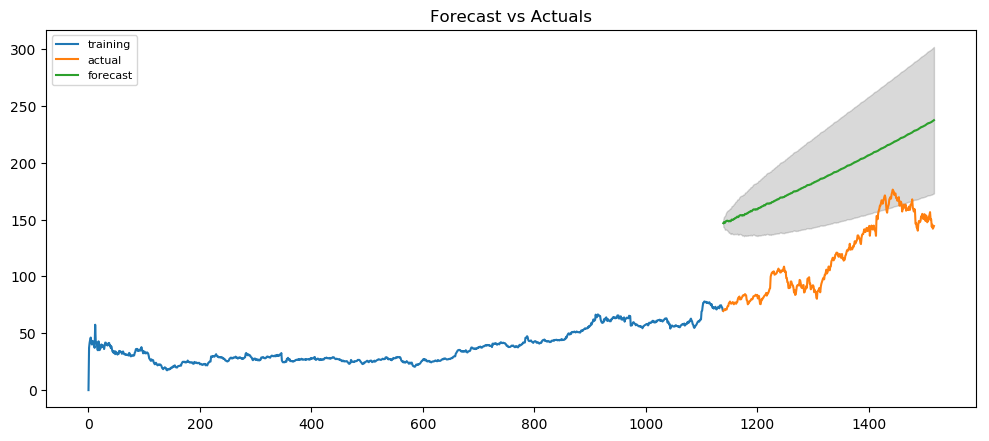

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
df6=fc.tolist()
df6

[146.77741731033458,
 147.67239111538436,
 147.48721018295268,
 147.08888852066818,
 147.8032296114718,
 148.607579497228,
 148.85412253550413,
 149.01988010244696,
 148.82504618836063,
 148.7914328255502,
 148.3067494158055,
 148.72046035207356,
 148.91933747016097,
 148.44677673590294,
 148.9292085961923,
 149.95550458568107,
 149.77879939085727,
 149.60965658321524,
 149.9873209491335,
 150.5167703430618,
 150.4619314035586,
 151.1039666708883,
 151.53355627666778,
 151.51529571358265,
 151.78798176946117,
 152.60194546321512,
 152.39127771844815,
 152.13193329017133,
 152.76592554234665,
 153.48211775049435,
 153.74512565638565,
 153.94937580118616,
 153.77184721437845,
 153.80627314359384,
 153.41223012460787,
 153.78907308676062,
 153.9989867798788,
 153.65232390142674,
 154.07315526879538,
 154.9817287835728,
 154.88585391065502,
 154.80461065658494,
 155.1754612631812,
 155.6781555227419,
 155.61574196765082,
 156.20427387748353,
 156.5598996702164,
 156.58310681635453,
 156.85

In [ ]:
df6

[146.77741731033458,
 147.67239111538436,
 147.48721018295268,
 147.08888852066818,
 147.8032296114718,
 148.607579497228,
 148.85412253550413,
 149.01988010244696,
 148.82504618836063,
 148.7914328255502,
 148.3067494158055,
 148.72046035207356,
 148.91933747016097,
 148.44677673590294,
 148.9292085961923,
 149.95550458568107,
 149.77879939085727,
 149.60965658321524,
 149.9873209491335,
 150.5167703430618,
 150.4619314035586,
 151.1039666708883,
 151.53355627666778,
 151.51529571358265,
 151.78798176946117,
 152.60194546321512,
 152.39127771844815,
 152.13193329017133,
 152.76592554234665,
 153.48211775049435,
 153.74512565638565,
 153.94937580118616,
 153.77184721437845,
 153.80627314359384,
 153.41223012460787,
 153.78907308676062,
 153.9989867798788,
 153.65232390142674,
 154.07315526879538,
 154.9817287835728,
 154.88585391065502,
 154.80461065658494,
 155.1754612631812,
 155.6781555227419,
 155.61574196765082,
 156.20427387748353,
 156.5598996702164,
 156.58310681635453,
 156.85

In [ ]:
model.fit(KL2)

ARIMA(callback=None, disp=0, maxiter=5000, method=None, order=(0, 1, 3),
   out_of_sample_size=252, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [ ]:
model

ARIMA(callback=None, disp=0, maxiter=5000, method=None, order=(0, 1, 3),
   out_of_sample_size=252, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [ ]:
model.fit?

In [ ]:
fitted.predict?

In [ ]:
# KL3, start_p=1, start_q=1,
#                              max_p=3, max_q=3, m=12,
#                              start_P=0, seasonal=True,
#                              d=1, D=1, trace=True,
#                              maxiter=5000,
#                              out_of_sample_size =252,
#                              error_action='ignore',  # don't want to know if an order does not work
# #                              suppress_warnings=True,  # don't want convergence warnings
#                              stepwise=True)  # set to stepwise
 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(KL3, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5897.059, BIC=5923.641, Fit time=9.401 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6963.942, BIC=6974.575, Fit time=0.115 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6425.802, BIC=6447.069, Fit time=1.569 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5897.771, BIC=5919.037, Fit time=5.819 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5891.949, BIC=5923.849, Fit time=12.368 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=6423.448, BIC=6450.031, Fit time=2.612 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5882.214, BIC=5919.430, Fit time=17.974 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5882.221, BIC=5914.121, Fit time=14.106 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5880.078, BIC=5922.610, Fit time=29.262 seconds
Fit ARIMA: order=(2, 1, 

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# Forecast
n_periods = 500
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(KL3), len(KL3)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(KL3)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Stock Prediction")
plt.show()

In [ ]:
# Forecast
n_periods = 500
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Stock Forecast")
plt.show()

In [ ]:
fitted_series

In [ ]:
# fitted_series.to_csv('KL_Fore.csv')